In [1]:
# load libraries and scripts
import JSON
using Plots
using HDF5
using Trapz
using Statistics
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")

compute_stable_sol (generic function with 1 method)

In [2]:
#load borders
border = import_border("../data/border.json")

# create the lattice grid
dx = 20
Nx, Ny, xrange, yrange, isinside, isborder, n = get_grid(border, Float64(dx))

# define x and y coordinate for plotting
x = repeat(reshape(xrange,1,Nx), Ny, 1)
y = repeat(reshape(yrange,Ny,1), 1, Nx);

In [18]:
# compute or load grid parameters
recompute_param = true
if(recompute_param || isfile("../numerics/grid_params_" * string(dx) * ".h5"))
    #bx, by, p, m, d = get_params_diff(isinside, isborder, Float64(dx), yrange, xrange, "../data/pantagruel.h5",
    #    "../numerics/grid_params_" * string(dx) * ".h5", Niter=5000, dmax = 10.0, patch=0.002, bmin=0.01)
    bx, by, p, m, d = get_params(isinside, isborder, Float64(dx), yrange, xrange, "../data/pantagruel.h5",
        "../numerics/grid_params_" * string(dx) * ".h5", bmin=100.0)
else
    bx, by, p, m, d = get_params(isinside, "../numerics/grid_params_" * string(dx) * ".h5")
end

([100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], [100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

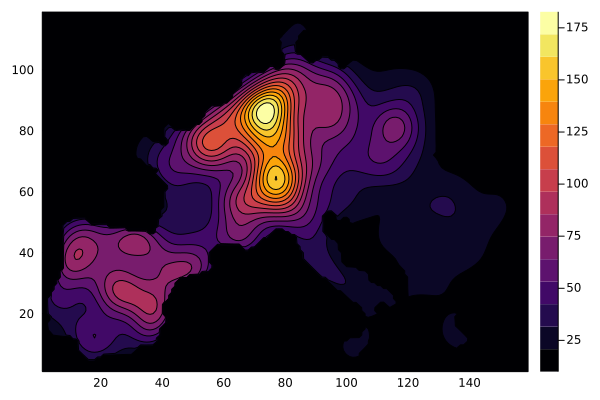

In [4]:
minimum(bx[bx.>0])
contour(bx,fill=true)

In [31]:
# compute, iteratively, the stable solution
th = compute_stable_sol(isinside, n, bx, by, p, Niter = 300);

  0.560449 seconds (45.28 M allocations: 736.117 MiB, 12.99% gc time)


In [6]:
# save the result
fid = h5open("../numerics/stable_" * string(dx) * ".h5", "w")
write(fid, "th", th)
close(fid)

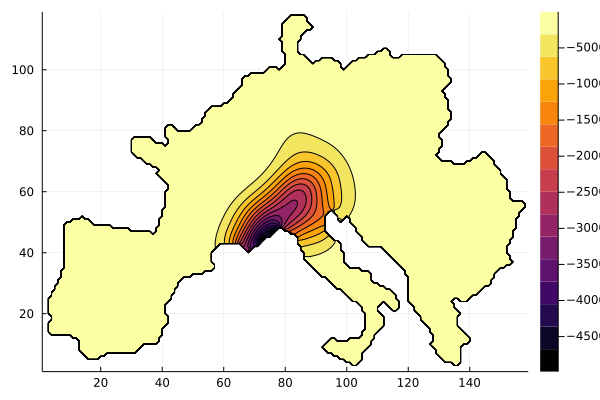

In [22]:
# plot the result
ctr_plot(isinside .| isborder, th)
#ctr_plot(isinside .| isborder, th,xlim=(40.0,60.0),ylim=(30.,50.))

In [23]:
argmax(abs.(th[:,:]))

CartesianIndex(45, 73)

In [26]:
bx[47:-1:43,71:75]

5×5 Matrix{Float64}:
 148.04   144.524  141.249  138.434  136.216
 145.02   141.263  137.728  134.643  132.156
 141.979  138.086  134.414  131.173  100.0
 138.753  134.842  100.0    100.0    100.0
 135.255  100.0    100.0    100.0    100.0

In [27]:
bx[47:-1:43,71:75]

5×5 Matrix{Float64}:
 148.04   144.524  141.249  138.434  136.216
 145.02   141.263  137.728  134.643  132.156
 141.979  138.086  134.414  131.173  100.0
 138.753  134.842  100.0    100.0    100.0
 135.255  100.0    100.0    100.0    100.0

In [28]:
p[47:-1:43,71:75]

5×5 Matrix{Float64}:
  0.000223065   0.000142034   7.0765e-5     7.48891e-6  -5.03471e-5
  9.46732e-5    4.6782e-5     8.54005e-6   -2.28369e-5  -5.08156e-5
 -3.09977e-5   -4.88705e-5   -5.77754e-5   -6.12483e-5  -6.3356e-5
 -0.000143325  -0.000136134  -0.000121032   0.0          0.0
 -0.000233522  -0.000207325   0.0           0.0          0.0

In [29]:
p[47:-1:43,71:75]

5×5 Matrix{Float64}:
  0.000223065   0.000142034   7.0765e-5     7.48891e-6  -5.03471e-5
  9.46732e-5    4.6782e-5     8.54005e-6   -2.28369e-5  -5.08156e-5
 -3.09977e-5   -4.88705e-5   -5.77754e-5   -6.12483e-5  -6.3356e-5
 -0.000143325  -0.000136134  -0.000121032   0.0          0.0
 -0.000233522  -0.000207325   0.0           0.0          0.0

In [30]:
th[47:-1:43,71:75]

5×5 Matrix{Float64}:
 -3.5699e8   -3.90457e8  -4.17939e8  -4.37497e8  -4.57748e8
 -3.8411e8   -4.21697e8  -4.51175e8  -4.60024e8  -4.69053e8
 -4.09398e8  -4.55583e8  -4.98515e8  -4.7546e8   -3.72936e8
 -4.26712e8  -4.8596e8   -4.88371e8   0.0         0.0
 -4.23568e8  -4.51277e8   0.0         0.0         0.0